### LINEAR REGRESSION MODEL

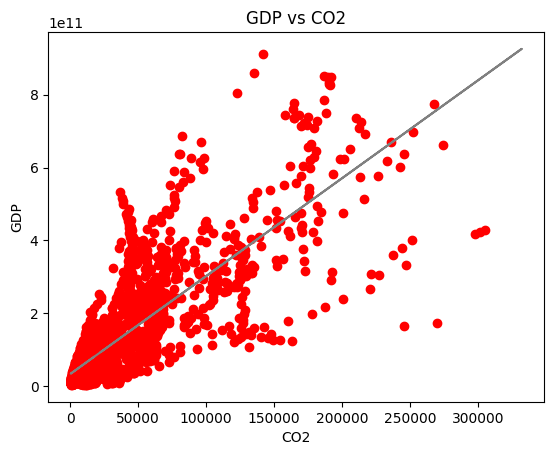

R^2:  0.637872527739179
Pearsons Correlation:  0.8080976332513121


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('dataset/cleaned_data.csv', sep=";")

features  = data[['co2']]
dependent = data[['gdp']]

# split the data into training and test data
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent, test_size=0.2, random_state=0)

linear_regression = LinearRegression()

linear_regression.fit(features_train, dependent_train)

predictions = linear_regression.predict(features_test)

plt.scatter(features_train, dependent_train, color = 'red')
plt.plot(features_test, linear_regression.predict(features_test), color='grey')
plt.title('GDP vs CO2')

plt.xlabel('CO2')
plt.ylabel('GDP')

plt.show()

print('R^2: ', linear_regression.score(features_test, dependent_test))
print('Pearsons Correlation: ', pearsonr(data['co2'], data['gdp'])[0])

## KNN

### KNN ACCURACY

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
features = data[['population','cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)
print(label_encoder.inverse_transform([0, 1, 2, 3]))

# Split the data into training and testing sets
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

# Fit the model
knn.fit(features_train, dependent_train)

# Predict using the model
predictions = knn.predict(features_test)

# Calculate the accuracy of the model
print(accuracy_score(dependent_test, predictions))
print(classification_report(dependent_test, predictions))


['High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'Upper-middle-income countries']
0.48653846153846153
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       158
           1       0.46      0.55      0.50       121
           2       0.56      0.32      0.40       139
           3       0.34      0.35      0.34       102

    accuracy                           0.49       520
   macro avg       0.48      0.47      0.47       520
weighted avg       0.49      0.49      0.48       520



### KNN 20 ROUNDS

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
features = data[['population','cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)

accuracy = []
for i in range(1,20):
    # Split the data into training and testing sets
    features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

    # Initialize the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=15)

    # Fit the model
    knn.fit(features_train, dependent_train)

    # Predict using the model
    predictions = knn.predict(features_test)

    # Calculate the accuracy of the model
    accuracy.append(accuracy_score(dependent_test, predictions))

print("Mean: ",np.mean(accuracy))
print("Min: ",np.min(accuracy))
print("Max: ",np.max(accuracy))

Mean:  0.4865384615384616
Min:  0.48653846153846153
Max:  0.48653846153846153


## DECISION TREE

### DECISION TREE ACCURACY

In [23]:
import pandas as pd
import numpy as nps
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
# ! POPULATION IS VERY IMPORTANT IN THIS CASE
features = data[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)
print(label_encoder.inverse_transform([0, 1, 2, 3]))

# Split the data into training and testing sets
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the model
dtree.fit(features_train, dependent_train)

# Predict using the model
predictions = dtree.predict(features_test)

# Evaluate the model
print(accuracy_score(dependent_test, predictions))
print(classification_report(dependent_test, predictions))

# Plot the decision tree
# plt.figure(figsize=(20, 10))

# tree.plot_tree(dtree, feature_names=features.columns, class_names=label_encoder.classes_, filled=True)
# plt.show()

['High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'Upper-middle-income countries']
0.8134615384615385
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       158
           1       0.90      0.86      0.88       121
           2       0.72      0.78      0.75       139
           3       0.73      0.68      0.70       102

    accuracy                           0.81       520
   macro avg       0.81      0.80      0.81       520
weighted avg       0.82      0.81      0.81       520



### DECISION TREE 20 ROUNDS

In [24]:
import pandas as pd
import numpy as nps
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
# ! POPULATION IS VERY IMPORTANT IN THIS CASE
features = data[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)

accuracy = []
for i in range(1,20):
    # Split the data into training and testing sets
    features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

    # Initialize the DecisionTreeClassifier
    dtree = DecisionTreeClassifier()

    # Fit the model
    dtree.fit(features_train, dependent_train)

    # Predict using the model
    predictions = dtree.predict(features_test)

    # Evaluate the model
    accuracy.append(accuracy_score(dependent_test, predictions))

print("Mean: ",np.mean(accuracy))
print("Min: ",np.min(accuracy))
print("Max: ",np.max(accuracy))

Mean:  0.8046558704453443
Min:  0.7923076923076923
Max:  0.8211538461538461


## RANDOM FOREST

### RANDOM FOREST ACCURACY

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
# ! POPULATION IS VERY IMPORTANT IN THIS CASE
features = data[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)
print(label_encoder.inverse_transform([0, 1, 2, 3]))
# Split the data into training and testing sets
features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
rforest = RandomForestClassifier()
rforest = rforest.fit(features_train, dependent_train)

# Make predictions on the test data
predictions = rforest.predict(features_test)

print(accuracy_score(dependent_test, predictions))
print(classification_report(dependent_test, predictions))

['High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'Upper-middle-income countries']
0.9019230769230769
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       158
           1       0.91      0.96      0.93       121
           2       0.85      0.86      0.85       139
           3       0.88      0.78      0.83       102

    accuracy                           0.90       520
   macro avg       0.90      0.89      0.89       520
weighted avg       0.90      0.90      0.90       520



### RANDOM FOREST 20 ROUNDS

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("dataset/cleaned_data.csv", sep=";")

# Extract the relevant columns
# ! POPULATION IS VERY IMPORTANT IN THIS CASE
features = data[['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']]
dependent = data['classification']

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
dependent_encoded = label_encoder.fit_transform(dependent)

accuracy = []
for i in range(1,20):
    # Split the data into training and testing sets
    features_train, features_test, dependent_train, dependent_test = train_test_split(features, dependent_encoded, test_size=0.2, random_state=42)

    # Initialize and fit the RandomForestClassifier
    rforest = RandomForestClassifier()
    rforest = rforest.fit(features_train, dependent_train)

    # Make predictions on the test data
    predictions = rforest.predict(features_test)

    accuracy.append(accuracy_score(dependent_test, predictions))

print("Mean: ",np.mean(accuracy))
print("Min: ",np.min(accuracy))
print("Max: ",np.max(accuracy))

Mean:  0.8995951417004049
Min:  0.8884615384615384
Max:  0.9096153846153846
